# Machine Learning -  Linear Regression in Python
<a id="top"></a>

Notes on implementing Linear Regression in python.

### 1. [Data Analysis](#0)

### 2. [Simple Linear Regression](#0)
* [`Gradient Descent` Python Implementation](#1)
* [`Scipy` Implementation](#2)
* [`Scikit-Learn` Implementation](#3)
* [`Statsmodel` Implementation](#4)
* [Multi-step visual of Gradient Descent](#5)
* [Animating the Gradient Descent](#6)  

### 3. [Multi Linear Regression](#7)
* [`Gradient Descent` Python Implementation](#8)
* [`Scikit-Learn` Implementation](#9)
* [Solving with `Normal Equation`](#10)
* [`Scipy` Implementation](#11)
* [`Statsmodel` Implementation](#12)

Importing needed libraries

In [478]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading our housing dataset 
We will load our data on house sales in King County to predict house prices using simple (one input) linear regression

In [479]:
dataset = pd.read_csv('datasets/kc_house_data.csv')

__We want to be able to predict `Y` which is our price variable.__ 

In [480]:
Y = dataset[['price']]

In [481]:
X = dataset.drop(['price', 'id', 'date'],  axis=1)

<a id = '0'></a>
# 1. Data Analysis
[Top](#top)

## Basic data discovery and analysis with `info`, `describe` and `head`

using pandas `.info()` we see we have 18 columns and 21613 records. Pretty much all the features given are already in numeric format.

In [482]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(4), int64(14)
memory usage: 3.0 MB


In [483]:
#list our columns 
columns = X.columns
columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [484]:
#show first 5 records
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


__Generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution, excluding `NaN` values__

In [485]:
X.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


__Compute correlation between variables and our predictor variable__

In [486]:
dataset = dataset.drop(['id', 'date'], axis=1)

In [487]:
dataset.corr(method='pearson')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


__We can even visualize the table above__

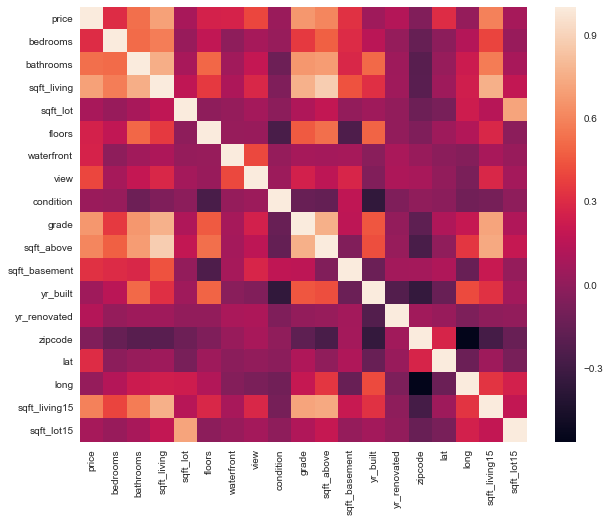

In [488]:
plt.subplots(figsize=(10,8))
sns.heatmap(dataset.corr())

### `statsmodel` package can also give us some great insight and summary statistics including `p-value` 
The statsmodel can actually perform the regression modeling for us , but here I am mainly using it to help determine which variable I should focus on for my `Simple Linear Regression` (one independent variable) and get a feel of which values are statistically significant. There are techniques when dealing with `Multiple Linear Regression` (many variable) to narrow down to the most significant features/variables usiung __Step Wise Regression__ which include techniques such as __Forward Selection__ and __Backward Elimination__.  


In [489]:
import statsmodels.formula.api as sml
from statsmodels import tools

X_new = tools.add_constant(X)

regressor_OLS = sml.OLS(endog = y,exog =  X_new).fit()

regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2960.
Date:                Wed, 22 Aug 2018   Prob (F-statistic):               0.00
Time:                        23:17:53   Log-Likelihood:            -2.9460e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21595   BIC:                         5.894e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           6.69e+06   2.93e+06      2.282      0.022    9.44e+05    1.24e+07
bedrooms      -3.577e+04   1891.843    -18.906      0.000   -3.95e+04   -3.21e+04
bathrooms      4.114e+04   3253.678     12.645      0.000    3.48e+04    4.75e+04
sqft_living     110.4380      2.270     48.661      0.000     105.990     114.886
sqft_lot          0.1286      0.048      2.683      0.007       0.035       0.223
floors         6689.5501   3595.859      1.860      0.063    -358.599    1.37e+04
waterfront      5.83e+05   1.74e+04     33.580      0.000    5.49e+05    6.17e+05
view           5.287e+04   2140.055     24.705      0.000    4.87e+04    5.71e+04
condition      2.639e+04   2351.461     11.221      0.000    2.18e+04     3.1e+04
grade          9.589e+04   2152.789     44.542      0.000    9.17e+04       1e+05
sqft_above       70.7901      2.253     31.418      0.000      66.374      75.207
sqft_basement    39.6625      2.647     14.985      0.000      34.475      44.850
yr_built      -2620.2232     72.659    -36.062      0.000   -2762.640   -2477.806
yr_renovated     19.8126      3.656      5.420      0.000      12.647      26.978
zipcode        -582.4199     32.986    -17.657      0.000    -647.074    -517.765
lat            6.027e+05   1.07e+04     56.149      0.000    5.82e+05    6.24e+05
long          -2.147e+05   1.31e+04    -16.349      0.000    -2.4e+05   -1.89e+05
sqft_living15    21.6814      3.448      6.289      0.000      14.924      28.439
sqft_lot15       -0.3826      0.073     -5.222      0.000      -0.526      -0.239
==============================================================================
Omnibus:                    18384.201   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1868224.491
Skew:                           3.566   Prob(JB):                         0.00
Kurtosis:                      47.985   Cond. No.                     2.52e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.45e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<a id="0"></a>
# <font color="red">Simple </font>Linear Regression

We will start with __Simple Linear Regression__ since it is easier to understand and visualize before moving to __Multiple Linear Regression__. Though, the conecpts overall are similar and the libraries we will be using are actually designed to handle both wihtout distinction. Simple Linear Regression is easier to plot and visualize so we will start with that.

It is __Simple Linear Regression__ when we have one dependent variable (feature) and one independent variable. Here we will pick `sqft_living` as our independent variable `x`.

Our goal is to estimate $\hat{y} = x {\theta_1} + \theta_0$, where $\theta_1$ is our coefficient and $\theta_0$ is our `Y` intercept. To estimate $\hat{y}$ we need to find a function such as $\hat{y} = h(x) = x {\theta_1} + \theta_0$

__We first start by creating our `x` and `y` variables. Then plotting to gain an intuition on how the data looks like.__

In [490]:
x = X[['sqft_living']]
y = Y

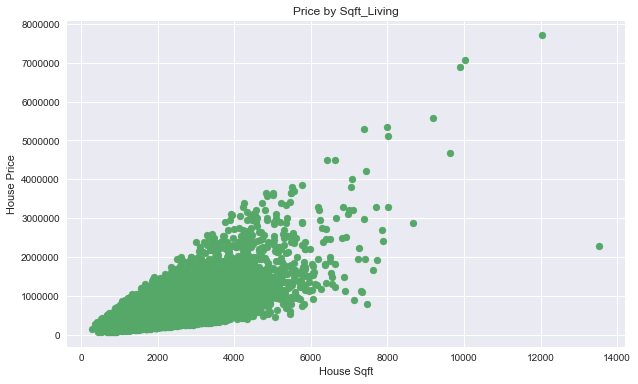

In [491]:
plt.figure(figsize=(10,6))
plt.xlabel('House Sqft')
plt.ylabel('House Price')
plt.title('Price by Sqft_Living')
plt.scatter(x,y, marker='o', color='g')

## Simple Linear Regression Implementations:

## 1. Using `seaborn.regplot()` and `scipy.stats`


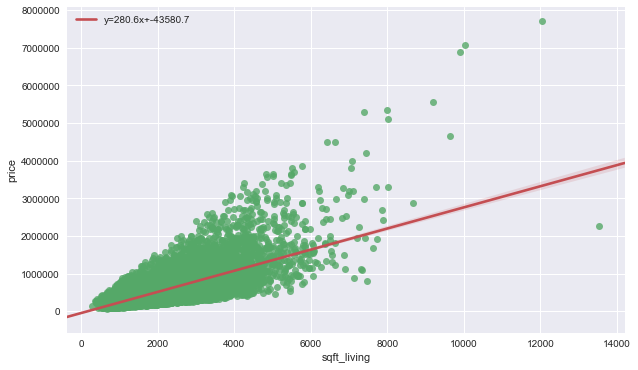

In [492]:
from scipy import stats
sns.set(color_codes=True)

slope, intercept, r_value, p_value, std_err = stats.linregress(data['sqft_living'],data['price'])

f = plt.figure(figsize=(10,6))
data = dataset[['price','sqft_living']]
ax = sns.regplot(x='sqft_living', y='price', data=data, 
                 scatter_kws={"color": "g"}, 
                line_kws={'color': 'r', 'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.legend()

In [493]:
print(std_err)

1.936398552


<a id='1'></a>
## 2. Manual Method : Gradient Descent Implementation

[Top](#top)

## Equations 
Objective of Linear Regression is to minimize the cost function: 
<br>
<br>
### $J(\theta) = \frac{1}{2m} \sum\limits_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2$
<br>
<br>
where the hypothesis $h_\theta(x)$ is given by the lienar model:  

### $h_\theta(x) = \theta^T X = \theta_1 X_1 + \theta_0 $  
<br>
In batch gradient descent, each iteration performs the update:  
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum\limits_{i=1}^{m}(h_\theta (x^{(i)}) - y^{(i)})x_j^{(i)}$


In [299]:
x = X[['sqft_living']]
y = Y

In [300]:
xg = x.values.reshape(-1,1)
yg = y.values.reshape(-1,1)
xg = np.concatenate((np.ones(len(x)).reshape(-1,1), x), axis=1)

#### Implementing the Cost Function $J(\theta)$ in python

In [316]:
print(slope, intercept)

280.623567897 -43580.7430945


In [317]:
def computeCost(x, y, theta):
    m = len(y)
    h_x = np.dot(x, theta)
    j = np.sum(np.square(h_x - y))/(2*m)
    return j

In [318]:
def GradientDescent(x, y, theta, alpha, iteration):
    print('Running Gradient Descent')
    j = []
    for i in range(0,iteration+1):
        j.append(computeCost(x, y, theta))
        m = len(y)
        h_x = np.dot(x, theta)
        theta[1] = theta[1] - alpha/m *(np.sum( np.dot(x.T, (h_x) - y)))
        theta[0] = theta[0] - alpha/m *(np.sum((h_x) - y))
    return theta, j

In [324]:
theta = np.zeros((2,1))
iteration = 10000
alpha = 1e-5

theta, cost = GradientDescent(xg, yg, theta, alpha, iteration)
print('Theta found by Gradient Descent: slope = {} and intercept {}'.format(theta[1], theta[0]))

Running Gradient Descent


/anaconda3/envs/deep3/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.
/anaconda3/envs/deep3/lib/python3.5/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in subtract
  


Theta found by Gradient Descent: slope = [ nan] and intercept [ nan]


**Plotting the linear fit**

TypeError: unhashable type: 'slice'

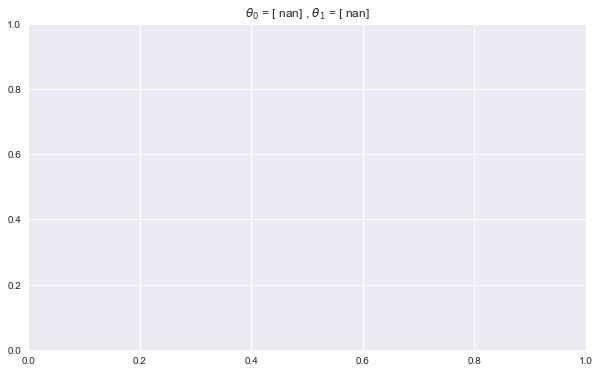

In [326]:
plt.figure(figsize=(10,6))
plt.title('$\\theta_0$ = {} , $\\theta_1$ = {}'.format(theta[0], theta[1]))
plt.scatter(x[:,1],y, marker='x', color='g')
plt.plot(x[:,1], np.dot(x, theta), 'r')

Text(0,0.5,'Cost')

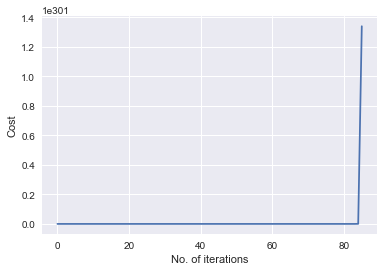

In [325]:
plt.plot(cost)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')

## 3. Manual Method: Compute Slope and Intercept using a Formula (Gradient = 0)

## Slope  $a = \frac{\sum (x_i-\bar{x})(y_i-\bar{Y})}{\sum (x_i-\bar{x})^2}$

## Intercept $b = \bar{y}-a\bar{x}$


In [494]:
def slr(X, Y):
    mean_x = X.mean()
    mean_y = Y.mean()

    delta_x = X - mean_x
    delta_y = Y - mean_y

    slope = (delta_x * delta_y).sum()/(delta_x**2).sum()
    intercept = mean_y - slope*mean_x
    
    return (slope, intercept)

In [495]:
xf = x.values.reshape(-1,1)
yf = y.values.reshape(-1,1)

slope, intercept = slr(xf, yf)
print('Slope = {} and Intercept = {}'.format(slope, intercept))
print('y = x({}) + {}'.format(slope, intercept))

Slope = 280.6235678974483 and Intercept = -43580.74309447408
y = x(280.6235678974483) + -43580.74309447408


<a id='2'></a>
## 4. Implement with using Scipy

In [496]:
from scipy import stats

xs = x.iloc[:,0]
ys = y.iloc[:,0]
#xs = np.concatenate((np.ones(len(x)).reshape(-1,1), x), axis=1)

slope, intercept, r_value, p_value, std_err = stats.linregress(xs, ys)

In [497]:
print('Slope = {} and Intercept = {}'.format(slope, intercept))
print('y = x({}) + {}'.format(slope, intercept))

Slope = 280.62356789744837 and Intercept = -43580.743094474194
y = x(280.62356789744837) + -43580.743094474194


#### Plot the linear fit using the slop and intercept values from scipy

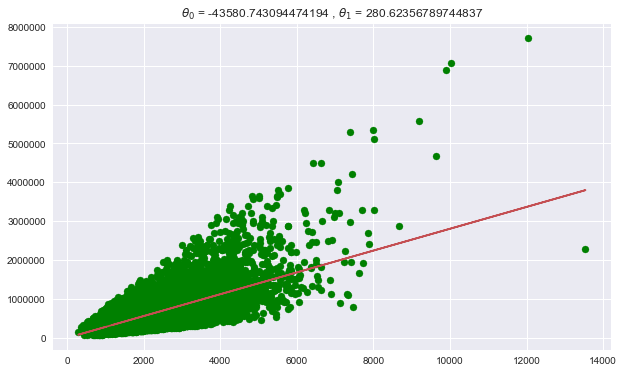

In [498]:
plt.figure(figsize=(10,6))
plt.title('$\\theta_0$ = {} , $\\theta_1$ = {}'.format(intercept, slope))
plt.scatter(xs,y, marker='o', color='green')
plt.plot(xs, np.dot(x, slope), 'r')

<a id='3'></a>
## 5. Implement using Scikit-Learn

In [535]:
xsl = x.values.reshape(-1,1)
ysl = y.values.reshape(-1,1)
xsl = np.concatenate((np.ones(len(xsl)).reshape(-1,1), xsl), axis=1)

from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(xsl[:,1].reshape(-1,1), ysl.reshape(-1,1))
y_hat = slr.predict(xsl[:,1].reshape(-1,1))

print('theta[0] = ', slr.intercept_)
print('theta[1] = ', slr.coef_)

thetas = np.array((slr.intercept_, slr.coef_)).squeeze()

theta[0] =  [-43580.74309447]
theta[1] =  [[ 280.6235679]]


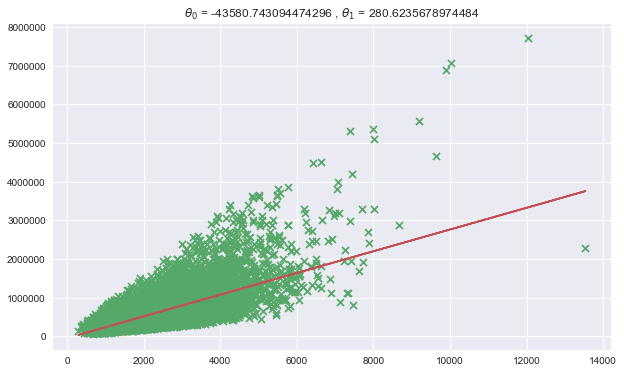

In [540]:
plt.figure(figsize=(10,6))
plt.title('$\\theta_0$ = {} , $\\theta_1$ = {}'.format(thetas[0], thetas[1]))
plt.scatter(xsl[:,1],y, marker='x', color='g')
plt.plot(xsl[:,1], np.dot(xsl, thetas), 'r')

<a id='4'></a>
## Implement using Statsmodel

In [520]:
xsm = x.values.reshape(-1,1)
ysm = y.values.reshape(-1,1)
xsm = np.concatenate((np.ones(len(x)).reshape(-1,1), xsm), axis=1)

import statsmodels.api as sm

results = sm.OLS(ysm, xsm).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Wed, 22 Aug 2018   Prob (F-statistic):               0.00
Time:                        23:22:59   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.358e+04   4402.690     -9.899      0.000   -5.22e+04    -3.5e+04
x1           280.6236      1.936    144.920      0.000     276.828     284.419
==============================================================================
Omnibus:                    14832.490   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546444.713
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.977   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

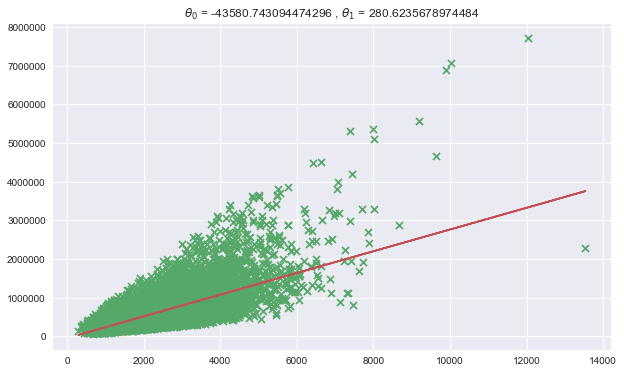

In [537]:
thetas = results.params

plt.figure(figsize=(10,6))
plt.title('$\\theta_0$ = {} , $\\theta_1$ = {}'.format(thetas[0], thetas[1]))
plt.scatter(xsm[:,1],ysm, marker='x', color='g')
plt.plot(xsm[:,1], np.dot(xsm, thetas), 'r')

<a id='7'></a>
# <font color="Red">Multiple</font> Linear Regression
[Top](#top)

In [544]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dataset = pd.read_csv('datasets/kc_house_data.csv')
Y = dataset[['price']]
X = dataset.drop(['price', 'id', 'date'],  axis=1)

In [545]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**Feature Normalization**

In [546]:
x = X.values
y = Y.values

In [547]:
def featureNormalize(x_m):
    mu = np.zeros((1,x_m.shape[1]))
    sigma = np.zeros((1,x_m.shape[1]))
    x_norm = x_m.astype(float)
    
    for i in range(0,len(mu)+1):
        mu[:,i] = x_m[:,i].mean()
        sigma[:,i] = x_m[:,i].std()
        x_norm[:,i] = (x_m[:,i] - mu[:,i])/sigma[:,i]
    return (x_norm, mu, sigma)

**Normalized**

In [548]:
x_norm, mu, sigma = featureNormalize(x)
x_norm = np.concatenate((np.ones(len(x_norm)).reshape(-1,1), x_norm), axis=1)

In [549]:
def computeCost_m(x, y, theta):
    m = len(y)
    h_x = np.dot(x, theta)
    j = np.sum(np.square(h_x - y))/(2*m)
    return j

In [550]:
theta_init = np.zeros((3, 1))
computeCost_m(x_norm, Y, theta_init)

ValueError: shapes (21613,19) and (3,1) not aligned: 19 (dim 1) != 3 (dim 0)

<a id='8'></a>
## Manual - Gradient Descent

In [109]:
def gradientDescentMulti(X, Y, theta, alpha, num_iters):
    m = len(Y)
    p = np.copy(X)
    t = np.copy(theta)
    j = []
    print('Running Gradient Descent')
    for i in range(0,num_iters+1):
        cost = computeCost_m(p, Y, t)
        j.append(cost)
        h_x = np.dot(p, t)
        err = h_x - Y
        for f in range(theta.size):
            t[f] = t[f] - alpha/m *(np.sum((np.dot(p[:,f].T, err))))
    return j, t

Running Gradient Descent


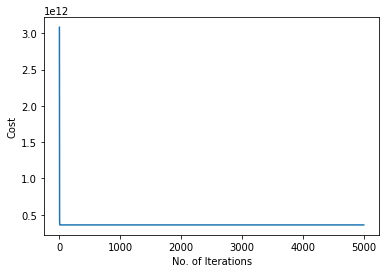

In [110]:
# theta_init = np.zeros((3, 1))
alpha = 0.01
num_iters = 5000
theta_init = np.zeros((3, 1))
cost, theta_final = gradientDescentMulti(x_norm, Y, theta_init, alpha, num_iters)

plt.figure()
plt.plot(cost)
plt.xlabel('No. of Iterations')
plt.ylabel('Cost')
plt.show()

In [111]:
theta_final

array([[  3.40412660e+05],
       [  9.32994561e-12],
       [ -8.81133664e-12]])

In [112]:
theta_init

array([[ 0.],
       [ 0.],
       [ 0.]])

<a id='9'></a>
## Multi-variable Regression with Scikit-Learn

In [551]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

mlr = LinearRegression()
sc_x = StandardScaler()
X_new = sc_x.fit_transform(x)

In [552]:
mlr.fit(X_new, Y)
y_hat = mlr.predict(X_new)

In [553]:
mlr.score(X_new, Y)

0.6997471890109157

In [554]:
mlr.intercept_

array([ 540088.14176653])

In [555]:
mlr.coef_

array([[ -33264.32545782,   31687.07437464,   81812.50710964,
           5326.46629074,    3612.19920732,   50434.93843527,
          40514.99473763,   17169.88047514,  112712.65585307,
          76305.51997634,   27005.67955588,  -76963.1122356 ,
           7958.11945582,  -31161.66927787,   83517.09842808,
         -30239.34618464,   14859.89955603,  -10447.48009171]])

<a id='10'></a>
## Solving with Normal Equation

In [556]:
x_neq = np.concatenate((np.ones(len(x)).reshape(-1,1), x), axis=1)
a = np.linalg.inv(np.dot(x_neq.T, x_neq))
b = np.dot(x_neq.T, y)
theta_neq = np.dot(a,b)

In [557]:
theta_neq

array([[  1.21808571e+07],
       [ -1.43952875e+06],
       [  7.73130865e+05],
       [ -6.89904908e+03],
       [ -2.32844470e-01],
       [ -7.79788933e+05],
       [ -1.43163411e+06],
       [  2.39718147e+05],
       [ -4.82622717e+04],
       [  2.64414980e+03],
       [  7.14417506e+03],
       [  6.44337185e+03],
       [ -2.62022321e+03],
       [  1.98125837e+01],
       [ -5.82419866e+02],
       [  6.02748226e+05],
       [ -2.14729828e+05],
       [  2.16814005e+01],
       [ -3.82641850e-01]])

<a id='11'></a>
### Scipy implementation

In [120]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(X_new[:,1].reshape(1,-1), Y.reshape(1,-1))

print('theta[0] = ', intercept)
print('theta[1] = ', slope)

theta[0] =  340412.659574
theta[1] =  54708.8217559


/anaconda3/envs/deep3/lib/python3.5/site-packages/scipy/stats/_stats_mstats_common.py:117: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/anaconda3/envs/deep3/lib/python3.5/site-packages/scipy/stats/_stats_mstats_common.py:118: RuntimeWarning: invalid value encountered in absolute
  prob = 2 * distributions.t.sf(np.abs(t), df)
/anaconda3/envs/deep3/lib/python3.5/site-packages/scipy/stats/_stats_mstats_common.py:119: RuntimeWarning: invalid value encountered in sqrt
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


<a id='12'></a>
### Statsmodel implementation
#### Statsmodel WITHOUT Feature Scaling/Normalization

In [558]:
import statsmodels.api as sm
#without feature scaling
results = sm.OLS(Y, x_neq).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2960.
Date:                Wed, 22 Aug 2018   Prob (F-statistic):               0.00
Time:                        23:31:12   Log-Likelihood:            -2.9460e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21595   BIC:                         5.894e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        6.69e+06   2.93e+06      2.282      0.022    9.44e+05    1.24e+07
x1         -3.577e+04   1891.843    -18.906      0.000   -3.95e+04   -3.21e+04
x2          4.114e+04   3253.678     12.645      0.000    3.48e+04    4.75e+04
x3           110.4380      2.270     48.661      0.000     105.990     114.886
x4             0.1286      0.048      2.683      0.007       0.035       0.223
x5          6689.5501   3595.859      1.860      0.063    -358.599    1.37e+04
x6           5.83e+05   1.74e+04     33.580      0.000    5.49e+05    6.17e+05
x7          5.287e+04   2140.055     24.705      0.000    4.87e+04    5.71e+04
x8          2.639e+04   2351.461     11.221      0.000    2.18e+04     3.1e+04
x9          9.589e+04   2152.789     44.542      0.000    9.17e+04       1e+05
x10           70.7901      2.253     31.418      0.000      66.374      75.207
x11           39.6625      2.647     14.985      0.000      34.475      44.850
x12        -2620.2232     72.659    -36.062      0.000   -2762.640   -2477.806
x13           19.8126      3.656      5.420      0.000      12.647      26.978
x14         -582.4199     32.986    -17.657      0.000    -647.074    -517.765
x15         6.027e+05   1.07e+04     56.149      0.000    5.82e+05    6.24e+05
x16        -2.147e+05   1.31e+04    -16.349      0.000    -2.4e+05   -1.89e+05
x17           21.6814      3.448      6.289      0.000      14.924      28.439
x18           -0.3826      0.073     -5.222      0.000      -0.526      -0.239
==============================================================================
Omnibus:                    18384.201   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1868224.491
Skew:                           3.566   Prob(JB):                         0.00
Kurtosis:                      47.985   Cond. No.                     2.52e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.45e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [559]:
tt = results.params

#predict house for 1650 and 3 bedroom
tt[0] + (tt[1] * 1650) + (tt[2] * 3)

-52201035.94329346

#### Statsmodel using Feature Scaling/Normalization

In [560]:
import statsmodels.api as sm
#with feature scaling
d = sm.add_constant(X_new)
results = sm.OLS(Y, d).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2960.
Date:                Wed, 22 Aug 2018   Prob (F-statistic):               0.00
Time:                        23:31:33   Log-Likelihood:            -2.9460e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21595   BIC:                         5.894e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.401e+05   1368.905    394.540      0.000    5.37e+05    5.43e+05
x1         -3.326e+04   1759.490    -18.906      0.000   -3.67e+04   -2.98e+04
x2          3.169e+04   2505.805     12.645      0.000    2.68e+04    3.66e+04
x3          8.181e+04   1588.340     51.508      0.000    7.87e+04    8.49e+04
x4          5326.4663   1984.923      2.683      0.007    1435.870    9217.062
x5          3612.1992   1941.679      1.860      0.063    -193.635    7418.034
x6          5.043e+04   1501.912     33.580      0.000    4.75e+04    5.34e+04
x7          4.051e+04   1639.923     24.705      0.000    3.73e+04    4.37e+04
x8          1.717e+04   1530.162     11.221      0.000    1.42e+04    2.02e+04
x9          1.127e+05   2530.456     44.542      0.000    1.08e+05    1.18e+05
x10         7.631e+04   1696.376     44.981      0.000     7.3e+04    7.96e+04
x11         2.701e+04   1559.700     17.315      0.000    2.39e+04    3.01e+04
x12        -7.696e+04   2134.197    -36.062      0.000   -8.11e+04   -7.28e+04
x13         7958.1195   1468.341      5.420      0.000    5080.062    1.08e+04
x14        -3.116e+04   1764.866    -17.657      0.000   -3.46e+04   -2.77e+04
x15         8.352e+04   1487.409     56.149      0.000    8.06e+04    8.64e+04
x16        -3.024e+04   1849.583    -16.349      0.000   -3.39e+04   -2.66e+04
x17         1.486e+04   2362.983      6.289      0.000    1.02e+04    1.95e+04
x18        -1.045e+04   2000.508     -5.222      0.000   -1.44e+04   -6526.336
==============================================================================
Omnibus:                    18384.201   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1868224.491
Skew:                           3.566   Prob(JB):                         0.00
Kurtosis:                      47.985   Cond. No.                     8.31e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.63e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [561]:
tt_fs = results.params

#predict house for 1650 and 3 bedroom
house = sc_x.transform(np.array([1650,3]).reshape(1,-1))
tt_fs[0] + (tt_fs[1] * house[0][0]) + (tt_fs[2] * house[0][1])

/anaconda3/envs/deep3/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


ValueError: operands could not be broadcast together with shapes (1,2) (18,) (1,2) 